In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

In [2]:
def bcb(codigo) :
    link = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'
    df = pd.read_json(link)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df

In [3]:
ipca = bcb(13522)

In [4]:
base = pd.read_excel(r'C:\Users\Pichau\Desktop\txdesemprego.xlsx', index_col = 0, header = 0)

In [5]:
base['IPCA'] = ipca

In [6]:
y = base['Taxa de desemprego']
x = base['IPCA']

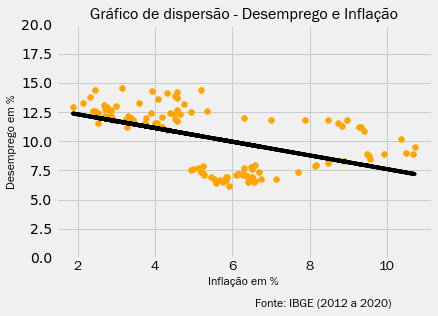

In [7]:
plt.scatter(x, y, color = 'orange')
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b, color = 'black', linestyle = 'solid')
plt.ylabel('Desemprego em %', fontsize = 12, fontname = 'Franklin Gothic Book')
plt.xlabel('Inflação em %', fontsize = 12, fontname = 'Franklin Gothic Book')
plt.title('Gráfico de dispersão - Desemprego e Inflação', fontsize = 16, fontname = 'Franklin Gothic Book')
plt.ylim(0, 20)
plt.xticks(fontname = 'Franklin Gothic Book')
plt.figtext(0.7, -0.1, "Fonte: IBGE (2012 a 2020)", ha="center", fontsize=12, fontname = 'Franklin Gothic Book')
plt.show()